In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x = np.linspace(0,np.pi / 2,num=1000)

In [35]:
yhat = np.cos(4 * x) ** 2

In [36]:
import matplotlib.pyplot as plt

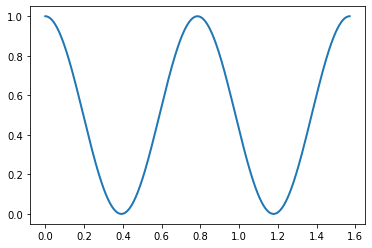

In [37]:
plt.plot(x,yhat,lw=2)

In [38]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

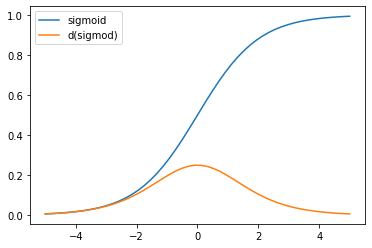

In [39]:
x = np.linspace(-5,5)
y1 = sigmoid(x)
y2 = deriv_sigmoid(x)

plt.plot(x,y1,label='sigmoid')
plt.plot(x,y2,label='d(sigmod)')
plt.legend()

In [126]:
hidden_layer = 8
err = []
w1 = np.random.normal(size=(1,hidden_layer))
b1 = np.random.normal(size=(1,hidden_layer))

w2 =  np.random.normal(size=(hidden_layer,1))
b2 = np.random.normal(size=(1,1))

x_train = np.random.uniform(0,np.pi/2,500)

learning_rate = 1
for epoch in range(1000):
    error = 0
    for i in range(len(x_train)):
        #print(i)
        x = np.array([x_train[i]])
        ytrue = np.array(np.cos(4*x))**2
        h = sigmoid(np.matmul(x,w1)+b1)

        ypred = sigmoid(np.matmul(h,w2)+b2)
        error += (ytrue-ypred) ** 2
        error = error
        d_err_d_ypred = -2 * (ytrue-ypred)

        d_ypred_d_w2 = h * deriv_sigmoid(np.matmul(h,w2)+b2)

        d_ypred_d_b2 = deriv_sigmoid(np.matmul(h,w2)+b2)

        d_ypred_d_h = w2 * deriv_sigmoid(np.matmul(x,w1)+b1).T

        d_h_d_w1 = x * deriv_sigmoid(np.matmul(x,w1)+b1)

        d_h_d_b1 = deriv_sigmoid(np.matmul(x,w1)+b1)

        w2 = w2 - learning_rate * np.matmul(d_err_d_ypred, d_ypred_d_w2).T
        w1 = w1 - learning_rate * np.matmul(d_err_d_ypred, d_ypred_d_h.T) * d_h_d_w1
        b2 = b2 - learning_rate * np.matmul(d_err_d_ypred, d_ypred_d_b2)
        b1 = b1 - learning_rate * np.matmul(d_err_d_ypred, d_ypred_d_h.T) * d_h_d_b1

    err.append(error)
    if err[-1] <= 0.05 * err[0]:
        print('Error is 3% of original error')
        break
    if epoch % 100 == 0:
        print(f'epoch {epoch}: error is {error[0][0]}')
print(f'epoch {epoch}: error is {error[0][0]}')
print('Finished')

epoch 0: error is 71.74839284165829
epoch 100: error is 20.9133064677431
Error is 3% of original error
epoch 106: error is 3.265562419176801
Finished


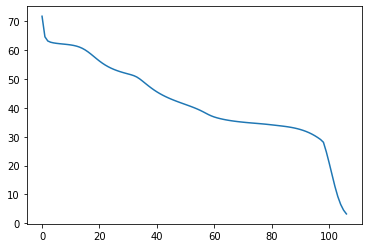

In [127]:
j_index = []
j_val = []
for i,j in enumerate(err):
    j_index.append(i)
    j_val.append(j[0][0])
    #print(j_index,j_val)
plt.plot(j_index,j_val)

In [128]:
x = np.linspace(0,np.pi/2,num=100)

In [129]:
yp = np.zeros(100)
for i in range(100):
    yp[i] = sigmoid(np.matmul(sigmoid(np.matmul(np.array([x[i]]),w1)+b1),w2)+b2)

yt = np.cos(4*x)**2

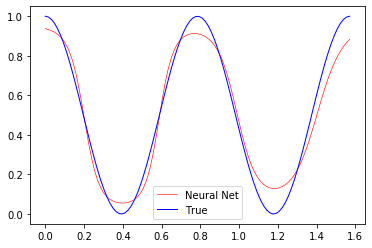

In [130]:
plt.plot(x,yp,c='r',lw=.6,label='Neural Net')
plt.plot(x,yt,c='b',lw=1,label='True')
plt.legend()